カラーも各店舗ごとに入力が異なるため、ある程度の統一をする  
主観的ではあるがとりあえず以下の色に分ける  
黒  
赤  
青(ネイビーやライトブルーも)  
白(今回はトリコロールも入れる)  
銀(グレーも)  
緑(ライム)  
黄色  
オレンジ   
茶色(カーキ、ベージュも含む)  
また、２種類で書かれているところは前の色を入れる

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import mojimoji

In [8]:
df=pd.read_csv('data_crf_ktm_reshape.csv',index_col=0)

In [9]:
#結合して気がついたが、２BL-STKが半角になっていないためここで修正した
def zen_to_han(text):
   text = mojimoji.zen_to_han(text)
   return text
# df['型式番号']=df['型式番号'].apply(zen_to_han)
# df.to_csv('data_crf_ktm_reshape.csv')

In [10]:
df_color = df.copy()[['id','価格','型式番号','モデル年','色','走行距離','保証期間','在庫店舗','店舗在庫']]

In [11]:
#扱いやすい様にカタカナを全て半角に変換
df_color['色']=df_color['色'].apply(zen_to_han)

In [12]:
bar_data=df_color['色'].value_counts()

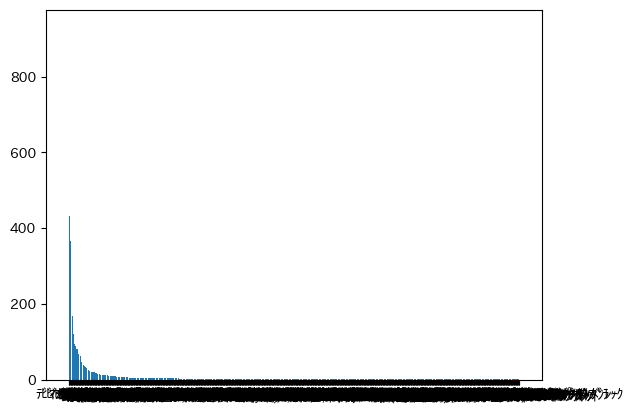

In [13]:
plt.bar(x=bar_data.index,height=bar_data.values)
plt.show()

In [14]:
bar_data

色
黒                       930
白                       431
青                       414
-                       367
赤                       348
                       ... 
緑/ｶﾞﾝﾒﾀ                   1
KRTｴﾃﾞｨｼｮﾝ                1
ｴﾎﾞﾆｰ/ﾌｧｲﾔｰｸﾗｯｶｰﾚｯﾄﾞ      1
ﾏｯﾄﾌﾞﾗｯｸ/ｶﾞﾝﾒﾀ            1
艶消し赤                      1
Name: count, Length: 736, dtype: int64

/で区切られた2色データの1つ目の要素をとってくる  
•で区切られた文字もある様なので、分割

In [15]:
df_color['色']=[i[0] for i in df_color['色'].str.split('/').values]
df_color['色']=[i[0] for i in df_color['色'].str.split('•').values]

In [16]:
df_color[df_color['色'].str.contains('ﾄﾘｺﾛｰﾙ')]

,id,価格,型式番号,モデル年,色,走行距離,保証期間,在庫店舗,店舗在庫
176,2100004238329,1698000,EBL-NC42,2017,ﾄﾘｺﾛｰﾙ,490,3,盛岡店,0120-37-8190
253,2100005316323,440000,CRF190L,2021,ﾄﾘｺﾛｰﾙ,0,7,新横浜店,0120-37-8190
340,2100005400442,1328000,EBL-SD04,2018,ﾄﾘｺﾛｰﾙ,7789,5,新潟店,0120-37-8190
600,2100005672009,1318000,EBL-SD04,2018,ﾄﾘｺﾛｰﾙ,29587,1,仙台店,0120-37-8190
625,2100005775472,1248000,EBL-SD04,2017,ﾄﾘｺﾛｰﾙ,24022,1,小山店,0120-37-8190
...,...,...,...,...,...,...,...,...,...
5511,2100006239874,698000,2BK-MD44,2021,ﾄﾘｺﾛｰﾙ,6635,5,岡山店,0120-37-8190
5758,2100006123548,348000,2BL-NC56,2016,ﾄﾘｺﾛｰﾙ,50712,3,上尾店,0120-37-8190
5842,2100006043747,2280000,2BL-S10AA,2020,ﾄﾘｺﾛｰﾙ,10892,3,伊丹店,0120-37-8190
5932,2100005521291,138000,BB-SA10J,2016,ﾄﾘｺﾛｰﾙ,4864,3,伊丹店,0120-37-8190


In [17]:
df_color['色'].value_counts()

色
黒                 1001
白                  526
青                  469
赤                  420
-                  367
                  ... 
ﾎﾞｽｸﾞﾚｰM             1
ﾌﾚｱﾊﾟﾀｰﾝ             1
ｷﾔﾝﾃﾞｲﾄｰﾝﾌﾞﾗｳﾝ       1
ﾒﾀﾘｯｸﾌﾞﾙｰ            1
艶消し赤                 1
Name: count, Length: 581, dtype: int64

黒:ﾌﾞﾗｯｸ、  
白:ﾎﾜｲﾄ、
青:ﾌﾞﾙｰ、ﾈｲﾋﾞ　　
赤:ﾚｯﾄﾞ、  
黄色:ｲｴﾛｰ､  
銀:ｸﾞﾚｰ、ｼﾙﾊﾞｰ  
緑:ｸﾞﾘｰﾝ、ｵﾘｰﾌﾞ  
茶色:ﾌﾞﾗｳﾝ、ﾍﾞｰｼﾞｭ、ｶｰｷ、  
オレンジ:ｵﾚﾝｼﾞ、ﾚﾌﾟｿﾙ  
紫:ﾊﾟｰﾌﾟﾙ,紫、ﾏｾﾞﾝﾀ、ﾋﾟﾝｸ  
ここでソートできなかったものは限定カラーとして処理
を含むものを集約していく  
本当はこういうのも画像でやれれば面白いと思う(今回はとってきていないため、これでやるしかない)

In [18]:
#隙間が空いていると上手くstr.containsが処理できない様なので' ','　'を取り除く
df_color['色']=df_color['色'].str.replace(' ','')
df_color.loc[df_color['色'].str.contains('ﾌﾞﾗｯｸ|ﾌﾞﾗﾂｸ|ﾌ゙ﾗｯｸ|black|ﾌﾗｯｸ|黒|ﾓﾝｽﾀｰ|ｴﾎﾞﾆｰ|ｶｰﾎﾞﾝ|ｸﾛ'),'色']='黒'
df_color.loc[df_color['色'].str.contains('ﾌﾞﾙｰ|ﾈｲﾋﾞｰ|紺|青|ｼｱﾝ|ﾊﾟｰﾙﾅｲﾄｼｪｰﾄﾞﾃｨｰﾙ|ﾓﾋﾞｽﾀｰ|ﾌﾞﾙ|水色|碧|ﾃﾞﾆﾑ'),'色']='青'
df_color.loc[df_color['色'].str.contains('ﾚｯﾄﾞ|赤|ﾚﾂﾄﾞ|ﾏﾙｰﾝ|ﾜｲﾝ|ｴﾝｼﾞ|ﾁｪﾘｰ'),'色']='赤'
df_color.loc[df_color['色'].str.contains('ｲｴﾛｰ|ｺﾞｰﾙﾄﾞ|黄|金|ﾀｲｶﾞｰ'),'色']='黄'
df_color.loc[df_color['色'].str.contains('ｸﾞﾘｰﾝ|ﾗｲﾑ|ｵﾘｰﾌﾞ|緑|KRT|ｷｬﾒﾚｵﾝ|ｸﾞﾘ-ﾝ|ｽﾌﾟﾙｰｽ|ﾆﾝｼﾞｬ'),'色']='緑'
df_color.loc[df_color['色'].str.contains('ｵﾚﾝｼﾞ|橙'),'色']='オレンジ'
df_color.loc[df_color['色'].str.contains('ﾌﾞﾗｳﾝ|ﾍﾞｰｼﾞｭ|ｶｰｷ|栗|茶|ｳｨｽｷｰ|ｳｲｽｷｰ|ﾌﾞﾛﾝｽﾞ'),'色']='茶'
df_color.loc[df_color['色'].str.contains('ﾏｾﾞﾝﾀ|ﾋﾟﾝｸ'),'色']='ピンク'
df_color.loc[df_color['色'].str.contains('紫|ﾊﾟｰﾌﾟﾙ'),'色']='紫'
df_color.loc[df_color['色'].str.contains('ﾎﾜｲﾄ|白|ﾊﾟｰﾙ|ﾓｰﾀｰ|ｻﾝﾄﾞ|ﾄﾘｺ|ｸﾘｰﾑ|ｱｲﾎﾞﾘ'),'色']='白'
#メタリックを入れるため最後
df_color.loc[df_color['色'].str.contains('ｼﾙﾊﾞｰ|ｸﾞﾚｰ|ｸﾞﾚｲ|GREY|灰|銀|ﾒﾀﾘｯｸ|ｶﾞﾝ|ﾁｬｺｰﾙ|ﾁﾀ|EBONY|ｸﾞﾚ-'),'色']='銀'


In [19]:
df_color['色'].value_counts()
other_list=list(df_color['色'].value_counts().index[13:])

In [20]:
other_list.append('火の玉')

In [21]:
other_list

['ﾚﾌﾟｿﾙ',
 'くまﾓﾝ',
 'ﾒｯｷ',
 'ｶﾓﾌﾗ',
 '105周年記念ﾓﾃﾞﾙｶﾗｰ',
 'ﾌﾚｱﾊﾟﾀｰﾝ',
 '鏡面',
 'APEXｶﾗｰ',
 'TAMIYA',
 'ｴｸｽﾀｰ',
 '火の玉']

In [22]:
df_color.loc[df_color['色'].isin (other_list),'色']='限定'

In [23]:
df_color['色'].value_counts()

色
黒       1655
青        927
白        824
赤        718
銀        684
-        367
緑        349
茶        227
黄        156
オレンジ     130
限定        37
紫         21
ピンク       12
Name: count, dtype: int64

In [24]:
df_color

,id,価格,型式番号,モデル年,色,走行距離,保証期間,在庫店舗,店舗在庫
0,2100006155617,118000,JBH-AF67,2012,黒,2742,3,京都店,0120-37-8190
1,2100004366077,1378000,EBL-NC42,2019,黒,776,5,仙台店,0120-37-8190
2,2100005457217,348000,JBK-ER250C,2013,白,11979,1,りんくうシークル店,0120-37-8190
3,2100005410007,578000,EBL-RH07J,2020,黒,4500,5,金沢店,0120-37-8190
4,2100005346689,568000,JUE4,2021,黒,5688,5,Husqvarna Motorcycles いわき店,0120-37-8190
...,...,...,...,...,...,...,...,...,...
6102,2100006097726,1018000,8BL-RM39J,2022,青,2964,7,広島店,0120-37-8190
6103,2100006214697,798000,BC-SK44A,2008,黒,11745,3,ラパークいわき店,0120-37-8190
6104,2100006202625,1198000,EBL-SC59,2013,オレンジ,23013,1,久留米店,0120-37-8190
6105,2100006271508,466000,JBK-RG10J,2019,赤,5895,5,東大阪店,0120-37-8190


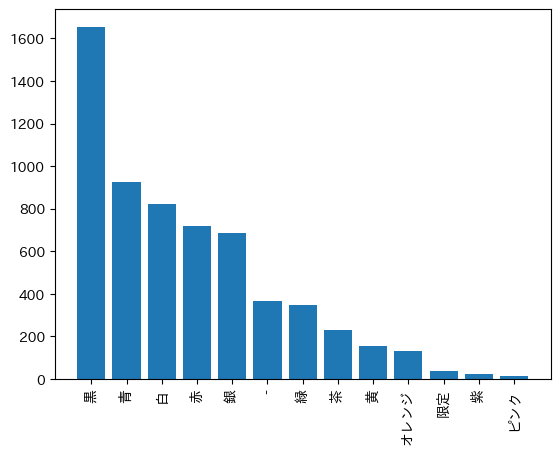

In [25]:
plt.bar(x=df_color['色'].value_counts().index,height=df_color['色'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [26]:
df_color[df_color['色'].str.contains('ｼﾙﾊﾞｰ')]

,id,価格,型式番号,モデル年,色,走行距離,保証期間,在庫店舗,店舗在庫


In [27]:
df_color

,id,価格,型式番号,モデル年,色,走行距離,保証期間,在庫店舗,店舗在庫
0,2100006155617,118000,JBH-AF67,2012,黒,2742,3,京都店,0120-37-8190
1,2100004366077,1378000,EBL-NC42,2019,黒,776,5,仙台店,0120-37-8190
2,2100005457217,348000,JBK-ER250C,2013,白,11979,1,りんくうシークル店,0120-37-8190
3,2100005410007,578000,EBL-RH07J,2020,黒,4500,5,金沢店,0120-37-8190
4,2100005346689,568000,JUE4,2021,黒,5688,5,Husqvarna Motorcycles いわき店,0120-37-8190
...,...,...,...,...,...,...,...,...,...
6102,2100006097726,1018000,8BL-RM39J,2022,青,2964,7,広島店,0120-37-8190
6103,2100006214697,798000,BC-SK44A,2008,黒,11745,3,ラパークいわき店,0120-37-8190
6104,2100006202625,1198000,EBL-SC59,2013,オレンジ,23013,1,久留米店,0120-37-8190
6105,2100006271508,466000,JBK-RG10J,2019,赤,5895,5,東大阪店,0120-37-8190


In [28]:
df_model = pd.read_csv('modelnumber.csv',index_col=0)

In [29]:
df_join=pd.merge(df_color,df_model,on='型式番号',how='left')

In [30]:
df_join.isnull().sum()

id      0
価格      0
型式番号    0
モデル年    0
色       0
走行距離    0
保証期間    0
在庫店舗    0
店舗在庫    0
メーカー    0
車両名     0
タイプ     0
排気量     0
dtype: int64

In [31]:
df_join[df_join['メーカー'].isnull()]

,id,価格,型式番号,モデル年,色,走行距離,保証期間,在庫店舗,店舗在庫,メーカー,車両名,タイプ,排気量


In [32]:
df_color.to_csv('bike_info_with_tenpo.csv')

# 一度df_info_with_tenpoとtenpo_dataをmergeして店舗IDを割り振る

In [43]:
#店舗在庫列は不要なので削除
df_color.drop(columns='店舗在庫',inplace=True)
df_color.rename(columns={'在庫店舗':'店舗名'},inplace=True)


In [44]:
#tenpo_dataを読み込み
df_tenpo = pd.read_csv('../data/整形後データ/tenpo_data.csv',index_col=0)

In [45]:
#店舗名をkeyにしてmerge
df_info_with_tempo = df_color.merge(df_tenpo,on='店舗名',how='left')

In [47]:
df_info_with_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6107 non-null   int64 
 1   価格      6107 non-null   int64 
 2   型式番号    6107 non-null   object
 3   モデル年    6107 non-null   object
 4   色       6107 non-null   object
 5   走行距離    6107 non-null   object
 6   保証期間    6107 non-null   object
 7   店舗名     6107 non-null   object
 8   郵便番号    6107 non-null   object
 9   住所      6107 non-null   object
 10  電話番号    6107 non-null   object
 11  店舗id    6107 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 572.7+ KB


欠損値がないため上手く結合できた


In [50]:
#店舗名、郵便番号、住所、電話番号を消して正規化
df_info = df_info_with_tempo.copy().drop(columns=df_info_with_tempo.columns[7:11],axis=1)


In [51]:
df_info

,id,価格,型式番号,モデル年,色,走行距離,保証期間,店舗id
0,2100006155617,118000,JBH-AF67,2012,黒,2742,3,51
1,2100004366077,1378000,EBL-NC42,2019,黒,776,5,2
2,2100005457217,348000,JBK-ER250C,2013,白,11979,1,58
3,2100005410007,578000,EBL-RH07J,2020,黒,4500,5,37
4,2100005346689,568000,JUE4,2021,黒,5688,5,81
...,...,...,...,...,...,...,...,...
6102,2100006097726,1018000,8BL-RM39J,2022,青,2964,7,67
6103,2100006214697,798000,BC-SK44A,2008,黒,11745,3,3
6104,2100006202625,1198000,EBL-SC59,2013,オレンジ,23013,1,74
6105,2100006271508,466000,JBK-RG10J,2019,赤,5895,5,54


In [52]:
df_info.to_csv('../data/整形後データ/bike_info.csv')